<center><font size = 5><b><i>Assignment1</i></b></font></center>
<div style="text-align: right"><i>By Yi Zhou</i></div>

<font size=5><b><i>Problem 1</i></b></font>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the text file
Y = iris[:,-1] # target value (iris species) is the last column
X = iris[:,0:-1]

<font size=4><b>Question 1.1</b></font>

In [9]:
print "Number of Features: " + str(X.shape[1]) + "  Number of data Points: " + str(X.shape[0])

Number of Features: 4  Number of data Points: 148


<font size=4><b>Question 1.2</b></font>

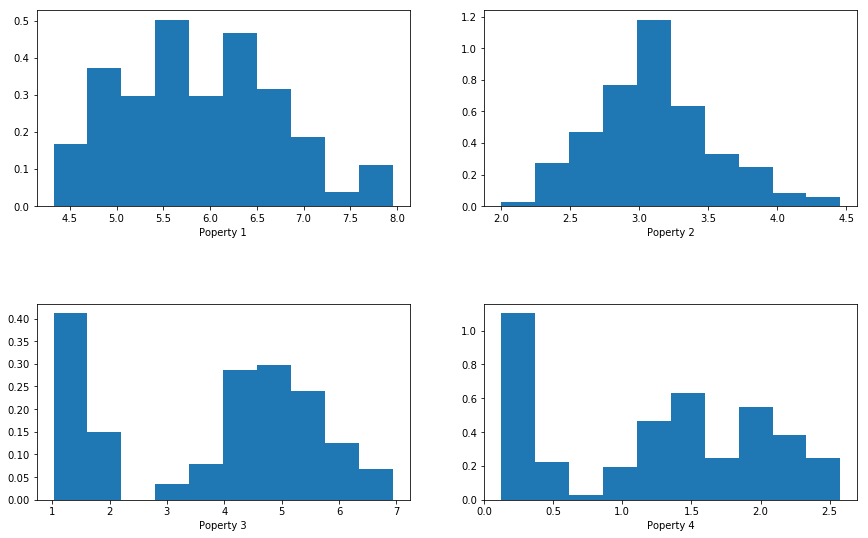

In [10]:
%matplotlib inline
plt.subplot(2,2,1)
#Adjust the size of each subplot to make the plot legible
plt.subplots_adjust(left = 0.1,hspace = 0.5,right = 2,top = 2,bottom = 0.3)
plt.hist(X[:,0],normed=True)
plt.xlabel("Poperty 1")
plt.subplot(2,2,2)
plt.hist(X[:,1],normed=True)
plt.xlabel("Poperty 2")
plt.subplot(2,2,3)
plt.hist(X[:,2],normed=True)
plt.xlabel("Poperty 3")
plt.subplot(2,2,4)
plt.hist(X[:,3],normed=True)
plt.xlabel("Poperty 4")

<font size=4><b>Question 1.3</b></font>

In [11]:
for i in range(0,4):
    print "Mean of Poperty " + str(i) + " is: " + str(np.mean(X[:,i])) + \
    ", Standard devision of Poperty " + str(i) + " is: " + str(np.std(X[:,i])) 

Mean of Poperty 0 is: 5.90010376419, Standard devision of Poperty 0 is: 0.833402066775
Mean of Poperty 1 is: 3.09893091689, Standard devision of Poperty 1 is: 0.436291838001
Mean of Poperty 2 is: 3.81955484054, Standard devision of Poperty 2 is: 1.75405710934
Mean of Poperty 3 is: 1.25255548459, Standard devision of Poperty 3 is: 0.758772457026


<font size=4><b>Question 1.4</b></font>

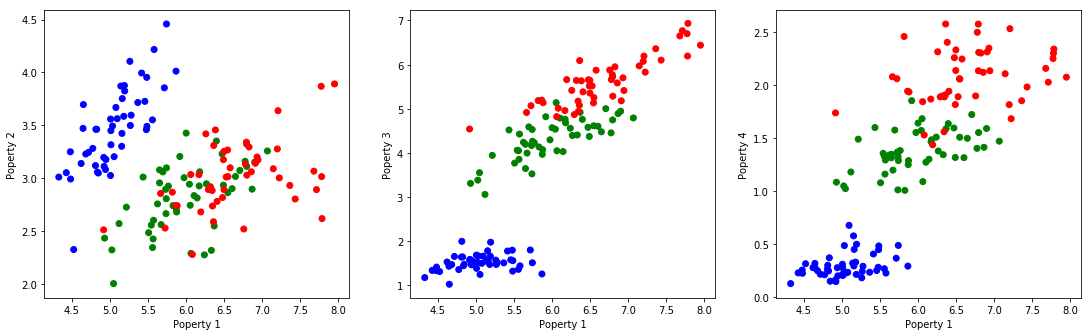

In [12]:
plt.subplot(1,3,1)
#Adjust the size of each subplot to make the plot legible
plt.subplots_adjust(left = 0.1,hspace = 0.5,right = 2.5,top = 2,bottom = 1)
plt.scatter(X[:,0],X[:,1],c=Y,cmap=matplotlib.colors.ListedColormap(["blue","green","red"]))
plt.xlabel("Poperty 1")
plt.ylabel("Poperty 2")
plt.subplot(1,3,2)
plt.scatter(X[:,0],X[:,2],c=Y,cmap=matplotlib.colors.ListedColormap(["blue","green","red"]))
plt.xlabel("Poperty 1")
plt.ylabel("Poperty 3")
plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,3],c=Y,cmap=matplotlib.colors.ListedColormap(["blue","green","red"]))
plt.xlabel("Poperty 1")
plt.ylabel("Poperty 4")

<font size=5><b><i>Problem 2</i></b></font>

In [13]:
iris = np.genfromtxt("data/iris.txt",delimiter=None) # load the data
Y = iris[:,-1]
X = iris[:,0:-1]

In [14]:
import mltools as ml

<font size=4><b>Question 2.1</b></font>

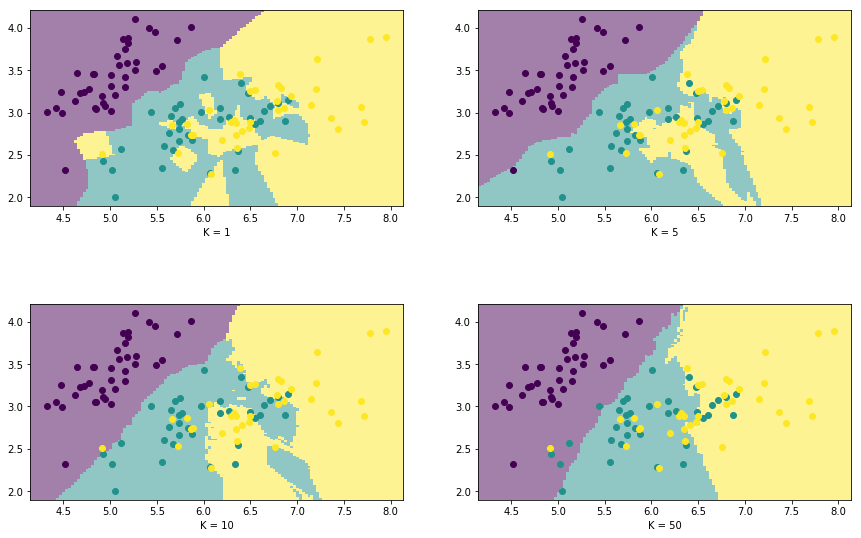

In [15]:
np.random.seed(0) # set the random number seed
X,Y = ml.shuffleData(X[:,0:2],Y); # shuffle data randomly, selecting the first two features
# (This is a good idea in case your data are ordered in some systematic way.)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/validation

K=[1,5,10,50]
knn = ml.knn.knnClassify() # create the object and train it
# knn.train(Xtr, Ytr, K) # where K is an integer, e.g. 1 for nearest neighbor prediction
# YvaHat = knn.predict(Xva) # get estimates of y for each data point in Xva
# Alternatively, the constructor provides a shortcut to "train":
plt.subplots_adjust(left = 0.1,hspace = 0.5,right = 2,top = 2,bottom = 0.3)
for i in range(0,4):
    knn = ml.knn.knnClassify( Xtr, Ytr, K[i]);
    #YvaHat = ml.knn.predict( knn, Xva );
    plt.subplot(2,2,i + 1)
    ml.plotClassify2D( knn, Xtr, Ytr ); # make 2D classification plot with data (Xtr,Ytr)
    plt.xlabel("K = " + str(K[i]))

<center><font size =4> <b>Classification Boundary Visualization on Training Data</b></font></center>

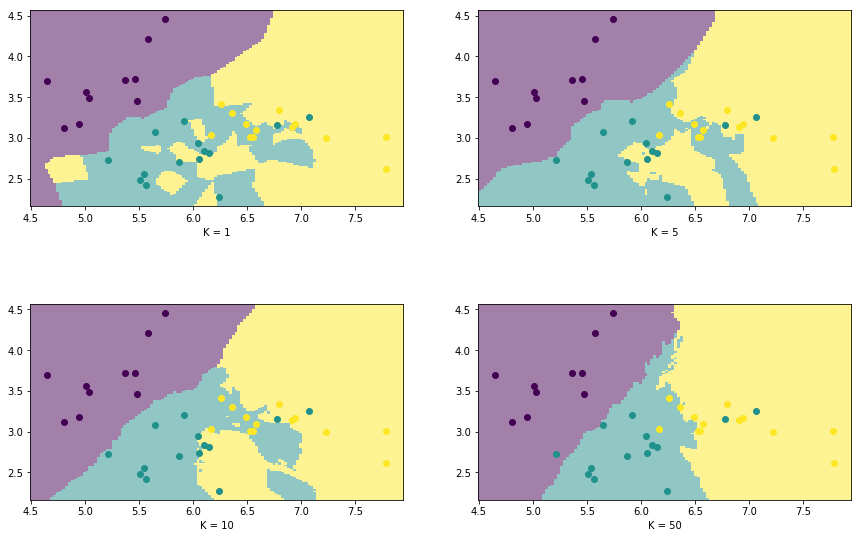

In [16]:
plt.subplots_adjust(left = 0.1,hspace = 0.5,right = 2,top = 2,bottom = 0.3)
for i in range(0,4):
    knn = ml.knn.knnClassify( Xtr, Ytr, K[i]);
    plt.subplot(2,2,i + 1)
    ml.plotClassify2D( knn, Xva, Yva ); # make 2D classification plot with data (Xtr,Ytr)
    plt.xlabel("K = " + str(K[i]))

<center><font size =4> <b>Classification Boundary Visualization on Validation Data</b></font></center>

<font size=4><b>Question 2.2</b></font>

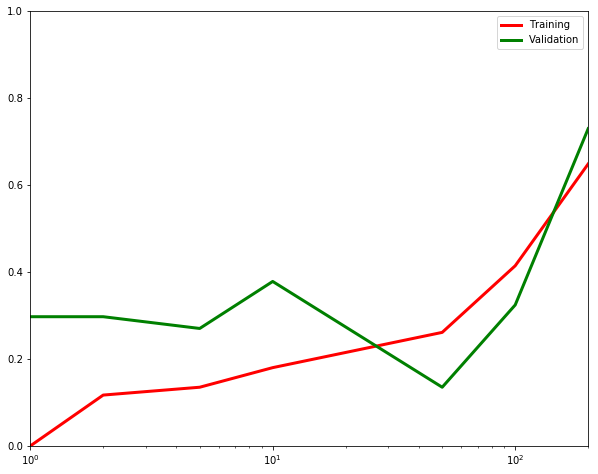

In [109]:
np.random.seed(0) # set the random number seed
Y = iris[:,-1]
X = iris[:,0:-1]
X,Y = ml.shuffleData(X[:,0:2],Y); # shuffle data randomly, selecting the first two features
# (This is a good idea in case your data are ordered in some systematic way.)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/validation
# np.random.seed(0) # set the random number seed
K=[1,2,5,10,50,100,200];
# for i,k in enumerate(K):
#     print i ,k
errTrain = [None]*len(K) # (preallocate storage for training error) for i,k in enumerate(K):
errValid = [None]*len(K)
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr,Ytr,K[i]) # TODO: complete code to train model
    YhatT = learner.predict(Xtr) # TODO: predict results on training data
    YhatV = learner.predict(Xva)
    errTrain[i] = float(sum(YhatT != Ytr))/float(Ytr.shape[0]) # TODO: count what fraction of predictions are wrong
    errValid[i] = float(sum(YhatV != Yva)/float(Yva.shape[0]))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# I added lw (line width) and the label. 
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValid, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
ax.legend()

# Controlling the axis.
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)

# And still doing this to clean the canvas.
plt.show()

<font size = 3>According to the plot above, K = 50 is what I recommend.</font>

<font size=4><b>Question 2.3</b></font>

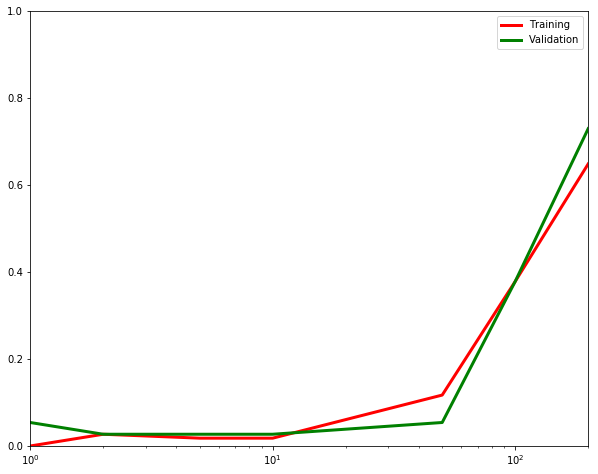

In [116]:
np.random.seed(0) # set the random number seed
Y = iris[:,-1]
X = iris[:,0:-1]
X,Y = ml.shuffleData(X,Y); # shuffle data randomly
# (This is a good idea in case your data are ordered in some systematic way.)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y, 0.75); # split data into 75/25 train/validation

K=[1,2,5,10,50,100,200];
# for i,k in enumerate(K):
#     print i ,k
errTrain = [None]*len(K) # (preallocate storage for training error) for i,k in enumerate(K):
errValid = [None]*len(K)
for i,k in enumerate(K):
    learner = ml.knn.knnClassify(Xtr,Ytr,K[i]) # TODO: complete code to train model
    YhatT = learner.predict(Xtr) # TODO: predict results on training data
    YhatV = learner.predict(Xva)
    errTrain[i] = float(sum(YhatT != Ytr))/float(Ytr.shape[0]) # TODO: count what fraction of predictions are wrong
    errValid[i] = float(sum(YhatV != Yva)/float(Yva.shape[0]))

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# I added lw (line width) and the label. 
ax.semilogx(K, errTrain, 'r-', lw=3, label='Training')
ax.semilogx(K, errValid, 'g-', lw=3, label='Validation')

# Adding a legend to the plot that will use the labels from the 'label'.
ax.legend()

# Controlling the axis.
ax.set_xlim(0, 200)
ax.set_ylim(0, 1)

# And still doing this to clean the canvas.
plt.show()

<font size = 3>The two plots are a alittle bit different, but their trends are the same. According to the plot above, K = 10 or K =5 are what I recommend.</font>

<font size=5><b><i>Problem 3</i></b></font>

<font size=4><b>Question 3.1</b></font>

<font size=3>Individual Probability:</font>

$$P(x_{1} = 1 | y = 1) = \frac{3}{4} \qquad P(x_{1} = 0 | y = 1) = \frac{1}{4} \qquad P(x_{1} = 1 | y = -1) = \frac{1}{2} \qquad P(x_{1} = 0 | y = -1) = \frac{1}{2}$$

$$P(x_{2} = 1 | y = 1) = 0 \qquad P(x_{2} = 0 | y = 1) = 1\qquad P(x_{2} = 1 | y = -1) = \frac{5}{6}\qquad P(x_{2} = 0 | y = -1) = \frac{1}{6}$$

$$P(x_{3} = 1 | y = 1) = \frac{3}{4}\qquad P(x_{3} = 0 | y = 1) = \frac{1}{4}\qquad P(x_{3} = 1 | y = -1) = \frac{2}{3}\qquad P(x_{3} = 0 | y = -1) = \frac{1}{3}$$
$$P(x_{4} = 1 | y = 1) = \frac{1}{2}\qquad P(x_{4} = 0 | y = 1) = \frac{1}{2}\qquad P(x_{4} = 1 | y = -1) = \frac{5}{6}\qquad P(x_{4} = 0 | y = -1) = \frac{1}{6}$$
$$P(x_{5} = 1 | y = 1) = \frac{1}{4}\qquad P(x_{5} = 0 | y = 1) = \frac{3}{4}\qquad P(x_{5} = 1 | y = -1) = \frac{1}{3}\qquad P(x_{5} = 0 | y = -1) = \frac{2}{3}$$

$$ P(y = 1) = \frac{2}{5}\qquad P(y = -1) = \frac{3}{5}$$

<font size=4><b>Question 3.2</b></font>

<font size=3>For $x = (0,0,0,0,0)$, I perdict $y = +1$，For $x = (1,1,0,1,0)$, I perdict $y = -1$</font>

<font size=4><b>Question 3.3</b></font>

(1)$$P(y=+1|x=(0,0,0,0,0))=\frac{P(x=(0,0,0,0,0)|y=+1)\;P(y=+1)}{P(x=(0,0,0,0,0)|y=+1)P(y=+1)+P(x=(0,0,0,0,0)|y=-1)P(y=-1)}$$
<p></p>
<center>where $P(x=(0,0,0,0,0)|y=+1) = P(x_{1}=0|y=+1)P(x_{2}=0|y=+1)P(x_{3}=0|y=+1)P(x_{4}=0|y=+1)P(x_{5}=0|y=+1)$</center>
<p></p>
<center>After subsituting number into the formula, we can get $P(y=+1|x=(0,0,0,0,0)) = \frac{81}{97}$</center>

(2) 
$$P(y=+1|x=(1,1,0,1,0))=\frac{P(x=(1,1,0,1,0)|y=+1)  P(y=+1)}{P(x=(1,1,0,1,0)|y=+1)P(y=+1)+P(x=(1,1,0,1,0)|y=-1)P(y=-1)}$$
<p></p>
<center>Because $P(x_{2}=1|y=1)=0$, we can get that $P(y=+1|x=(1,1,0,1,0)) = 0 $</center>

<font size=4><b>Question 3.4</b></font>

<font size=3>Because, for 5 binary features, we need $2^5$ data points in order to create a convincing joint Bayesian model, but in fact we have only 10 data points. For some features combinations, we can't observe them in training data. Besides, the probability of overfitting will increase when the model become more complex.</font>

<font size=4><b>Question 3.5</b></font>

We need to retrain the model, and the model will be something like the following:
$$P(y=+1|\;x=(x_{2},x_{3},x_{4},x_{5}))=\frac{P(x=(x_{2},x_{3},x_{4},x_{5})|\;y=+1)\;P(y=+1)}{P(x=(x_{2},x_{3},x_{4},x_{5})|\;y=+1)P(y=+1)+P(x=(x_{2},x_{3},x_{4},x_{5})|\;y=-1)P(y=-1)}$$
<p></p>
$$P(y=-1|\;x=(x_{2},x_{3},x_{4},x_{5}))=\frac{P(x=(x_{2},x_{3},x_{4},x_{5})|\;y=-1)\;P(y=-1)}{P(x=(x_{2},x_{3},x_{4},x_{5})|\;y=+1)P(y=+1)+P(x=(x_{2},x_{3},x_{4},x_{5})|\;y=-1)P(y=-1)}$$
<p></p>
<center>where $P(x=(x_{1},x_{2},x_{3},x_{4})|y=±1) = P(x_{2}=x_{2}|y=±1)P(x_{3}=x_{3}|y=±1)P(x_{4}=x_{4}|y=±1)P(x_{5}=x_{5}|y=±1)$</center>


<font size=5><b><i>Statement of Collaboration</b></i></font>

I obeyed the UCI Academic Honesty Policy. During my work on this assignment, I didn't discuss anything with anybody about the homework that's to say I finished all things above on my own.